<a href="https://colab.research.google.com/github/jairomartinezgiraldo/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalar la api de kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=8bccbeab92880c1d7a249b676836b10f24c0d6b31f37d9b311c6b3bc99f1d0d3
  Stored in directory: /root/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [2]:
# seleccionar api token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jairommartinezg","key":"1c02854f93cb8d27ae2b578639336988"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          12156        244  1.0              
arslaan5/explore-car-performance-fuel-efficiency-data        Explore Car Performance: Fuel Efficiency Data    5KB  2024-10-17 16:35:59           1167         26  1.0              
hasibur013/diabetes-dataset                                  Diabetes Dataset                                 9KB  2024-10-22 02:10:36            998         28  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset           

In [10]:
!mkdir my_dataset

In [8]:
!kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset

Dataset URL: https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset
License(s): CC0-1.0
 99% 441M/447M [00:05<00:00, 95.1MB/s]
100% 447M/447M [00:05<00:00, 87.4MB/s]


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/yoga-posture-dataset.zip', 'r')
zip_ref.extractall('/content/my_dataset')
zip_ref.close()

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

In [52]:
print(os.listdir('/content/my_dataset'))


['Hanumanasana', 'Adho Mukha Vrksasana', 'Sivasana', 'Phalakasana', 'Alanasana', 'Halasana', 'Ashta Chandrasana', 'Salamba Bhujangasana', 'Bakasana', 'Vrksasana', 'Vasisthasana', 'Setu Bandha Sarvangasana', 'Ustrasana', 'Garudasana', 'Utthita Hasta Padangusthasana', 'Virabhadrasana One', 'Pincha Mayurasana', 'Virabhadrasana Two', 'Malasana', 'Eka Pada Rajakapotasana', 'Camatkarasana', 'Padmasana', 'Navasana', 'Marjaryasana', 'Uttanasana', 'Bitilasana', 'Urdhva Dhanurasana', 'Urdhva Mukha Svsnssana', 'Anjaneyasana', 'Virabhadrasana Three', 'Balasana', 'Dhanurasana', 'Upavistha Konasana', 'Trikonasana', 'Parsvottanasana', 'Ardha Matsyendrasana', 'Supta Kapotasana', 'Adho Mukha Svanasana', 'Poses.json', 'Ardha Pincha Mayurasana', 'Utthita Parsvakonasana', 'Ardha Chandrasana', 'Utkatasana', 'Salamba Sarvangasana', 'Ardha Navasana', 'Baddha Konasana', 'Paschimottanasana', 'Parsva Virabhadrasana']


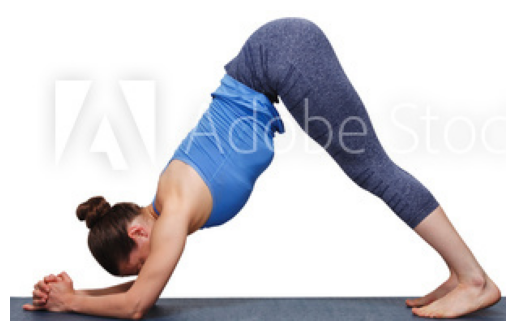

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Definir la ruta base del dataset
base_dir = '/content/my_dataset'

# Obtener la lista de subcarpetas
subfolders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Seleccionar una subcarpeta aleatoria
chosen_folder = np.random.choice(subfolders)
test_dir = os.path.join(base_dir, chosen_folder)  # Ruta completa de la subcarpeta seleccionada

# Escoger un índice aleatorio entre las imágenes disponibles
idx = np.random.randint(1, 10)
img_path = os.path.join(test_dir, f"File{idx}.png")  # Crear la ruta de la imagen

# Cargar la imagen y convertirla a RGB
img = cv2.imread(img_path)
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')  # Ocultar ejes
    plt.show()
else:
    print(f'Error: No se encontró la imagen en {img_path}')

Importamos las librerias

In [64]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2, imagenet_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

ImportError: cannot import name 'layers' from 'tensorflow.keras.models' (/usr/local/lib/python3.10/dist-packages/keras/_tf_keras/keras/models/__init__.py)

Preparamos los datos

In [58]:
IMG_SIZE = (224, 224)  # Tamaño esperado por MobileNetV2

# Listar todas las clases (subcarpetas)
class_names = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Crear listas para imágenes y etiquetas
X, y = [], []

# Cargar las imágenes y sus etiquetas
for class_idx, class_name in enumerate(class_names):
    class_path = os.path.join(base_dir, class_name)
    images = [img for img in os.listdir(class_path) if img.endswith('.png')]

    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=IMG_SIZE)  # Redimensionar
        img_array = img_to_array(img)  # Convertir a array
        X.append(img_array)
        y.append(class_idx)  # Etiqueta de clase

# Convertir a arrays de NumPy
X = np.array(X)
y = np.array(y)

# Normalizar las imágenes usando imagenet_utils
X = imagenet_utils.preprocess_input(X)

# Aplicar One-Hot Encoding a las etiquetas
y = to_categorical(y, num_classes=len(class_names))

print(f'Tamaño del conjunto de datos: {X.shape}, {y.shape}')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Tamaño del conjunto de datos: (2314, 224, 224, 3), (2314, 47)


**Dividimos el Dataset en Entrenamiento y Validación**

In [59]:
# Dividir en entrenamiento y validación (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño de X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Tamaño de X_val: {X_val.shape}, y_val: {y_val.shape}')

Tamaño de X_train: (1851, 224, 224, 3), y_train: (1851, 47)
Tamaño de X_val: (463, 224, 224, 3), y_val: (463, 47)


**Modelo Preentrenado - MobileNetV2**

In [60]:
# Cargar MobileNetV2 sin las capas superiores (include_top=False)
base_model = MobileNetV2(weights='imagenet',
                         include_top=False, #
                         input_shape=(224, 224, 3))
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [65]:
from tensorflow.keras import layers

#  Evitar que los pesos se modifiquen en la parte convolucional
base_model.trainable = False

# Definir el modelo usando Sequential
pre_trained_model = Sequential()
pre_trained_model.add(base_model)  # Agregar MobileNetV2 como base
pre_trained_model.add(layers.Flatten())  # Aplanar las salidas
pre_trained_model.add(layers.Dense(256, activation='relu', name="densa_1"))  # Capa oculta
pre_trained_model.add(layers.Dense(len(class_names), activation='softmax'))  # Capa de salida

# Compilar el modelo
pre_trained_model.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Mostrar el resumen del modelo
pre_trained_model.summary()


ValueError: Undefined shapes are not supported.